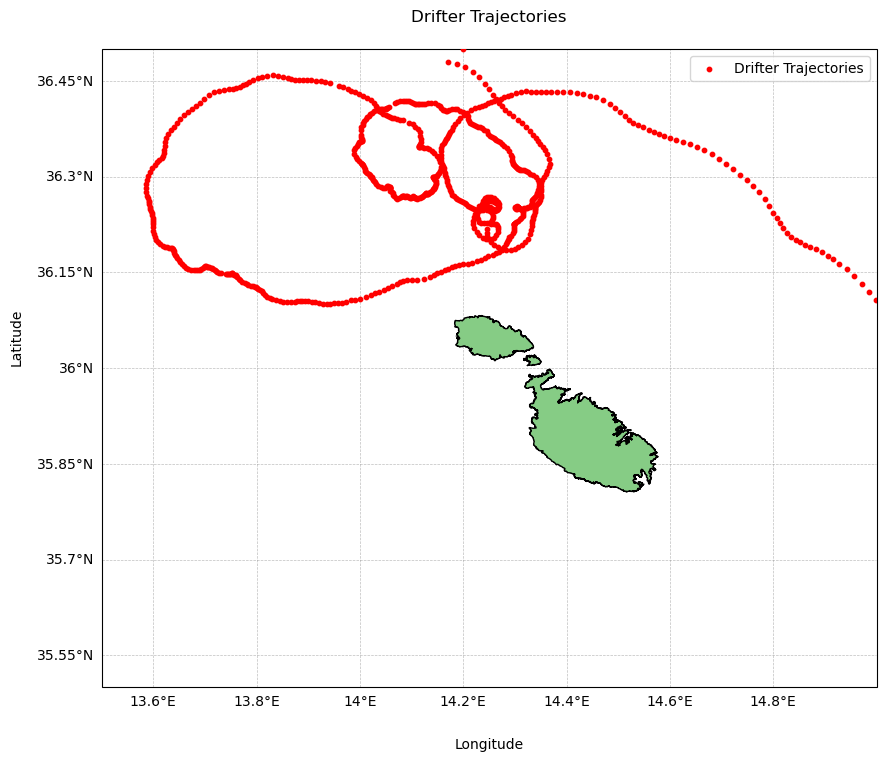

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd

# Path to the drifter data file
drifter_data_path = "../Data/drifter_trajectories/20210621_WaterColours_Drifters/Drifter 6501"

# Load the drifter data
drifter_data = pd.read_csv(drifter_data_path, delimiter='\t')

# Load the shapefile for Malta's coastline
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'
malta_coastline = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Prepare the plot with a geographic (Plate Carree) projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Define the geographic extent of the plot based on the broader area around Malta
extent = [13.50, 15.00, 35.50, 36.50]  
ax.set_extent(extent)

# Plot the coastline of Malta
malta_coastline.plot(ax=ax, color='#86CC85', edgecolor='black', linewidth=1, zorder=3)

# Plot the drifter trajectories with higher z-order to ensure visibility
ax.scatter(drifter_data['lon'], drifter_data['lat'], s=10, color='red', marker='o', 
           transform=ccrs.Geodetic(), zorder=5, label='Drifter Trajectories')

# Customize the plot
plt.title('Drifter Trajectories', pad=20)
ax.text(-0.1, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
ax.legend(loc='upper right')

# Add gridlines and labels to improve map readability
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Display the plot
plt.show()

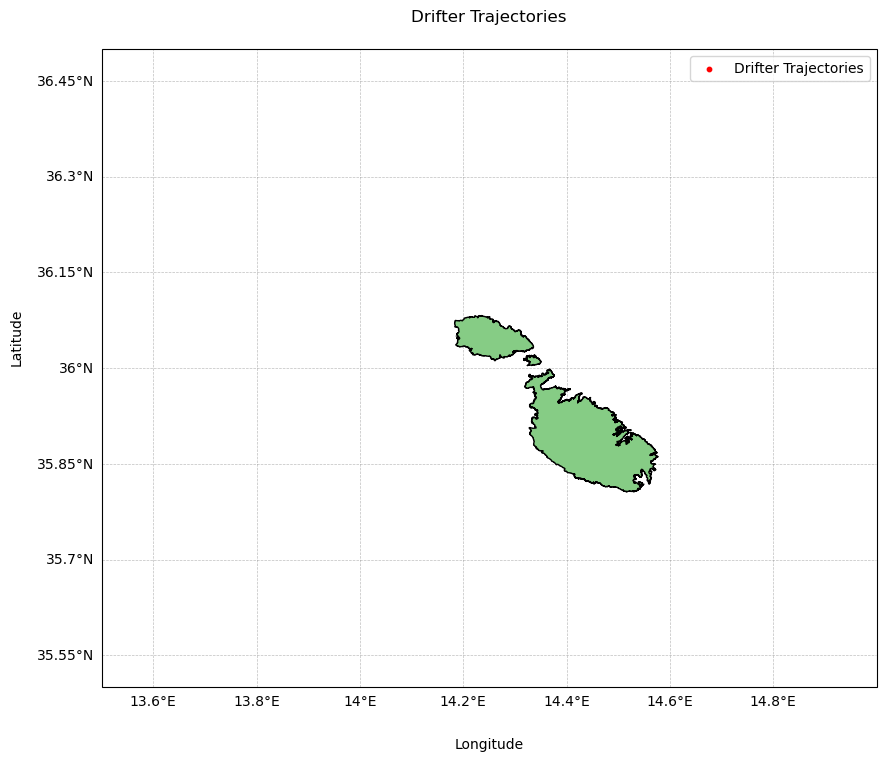

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
import re

# Improved function to convert DMS to decimal degrees
def dms_to_decimal(dms_str):
    # Regular expression to match DMS components
    dms_pattern = re.compile(r"(\d+)[°] (\d+)['] (\d+\.\d+)['\"]")
    match = dms_pattern.search(dms_str)
    if match:
        degrees, minutes, seconds = map(float, match.groups())
        return degrees + (minutes / 60) + (seconds / 3600)
    else:
        return None

# Path to the drifter data file
drifter_data_path = "../Data/drifter_trajectories/20210630_CODE_Calypso_South_Redeployment_experiment/CODE 11-300534061782530-20210702T050559UTC.csv"

# Load the drifter data with the correct encoding
drifter_data = pd.read_csv(drifter_data_path, delimiter=',', encoding='latin1')

# Strip leading spaces from column names
drifter_data.columns = drifter_data.columns.str.strip()

# Convert LATITUDE and LONGITUDE from DMS to decimal degrees
drifter_data['DECIMAL_LATITUDE'] = drifter_data['LATITUDE'].apply(dms_to_decimal)
drifter_data['DECIMAL_LONGITUDE'] = drifter_data['LONGITUDE'].apply(dms_to_decimal)

# Load the shapefile for Malta's coastline
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'
malta_coastline = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Prepare the plot with a geographic (Plate Carree) projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Define the geographic extent of the plot based on the broader area around Malta
extent = [13.50, 15.00, 35.50, 36.50]
ax.set_extent(extent)

# Plot the coastline of Malta
malta_coastline.plot(ax=ax, color='#86CC85', edgecolor='black', linewidth=1, zorder=3)

# Plot the drifter trajectories with higher z-order to ensure visibility
ax.scatter(drifter_data['DECIMAL_LONGITUDE'], drifter_data['DECIMAL_LATITUDE'], s=10, color='red', marker='o', transform=ccrs.Geodetic(), zorder=5, label='Drifter Trajectories')

# Customize the plot
plt.title('Drifter Trajectories', pad=20)
ax.text(-0.1, 0.55, 'Latitude', va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center', rotation='horizontal', rotation_mode='anchor', transform=ax.transAxes)
ax.legend(loc='upper right')

# Add gridlines and labels to improve map readability
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Display the plot
plt.show()